In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from tools import hic_norm, get_Several_MinMax_Array

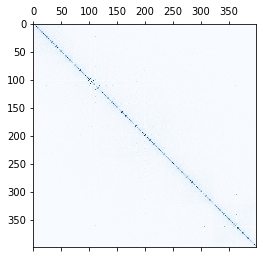

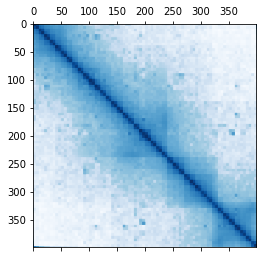

In [8]:
chr = 19
y, x = 11, 0

analyse_path = "/data1/lmh_data/MMSR_complete/analyse/GM12878/"

hr = np.load(os.path.join(analyse_path, 'use_data', 'hr', 'chr{}_1000b.npz'.format(chr)))['hic']
replaced = np.load(os.path.join(analyse_path, 'use_data', 'replaced', 'chr{}_1000b.npz'.format(chr)))['hic']

# hr = hic_norm(hr)
nums = int((hr != 0).sum() / 1000)
max_num = get_Several_MinMax_Array(hr.reshape(-1), -nums)[0]
hr[hr > max_num] = max_num
hr = hr / hr.max() * 255

replaced = hic_norm(replaced)

hr = hr[y, x]
replaced = replaced[y, x]

plt.matshow(hr, cmap=plt.cm.Blues)
plt.matshow(replaced, cmap=plt.cm.Blues)

plt.show()

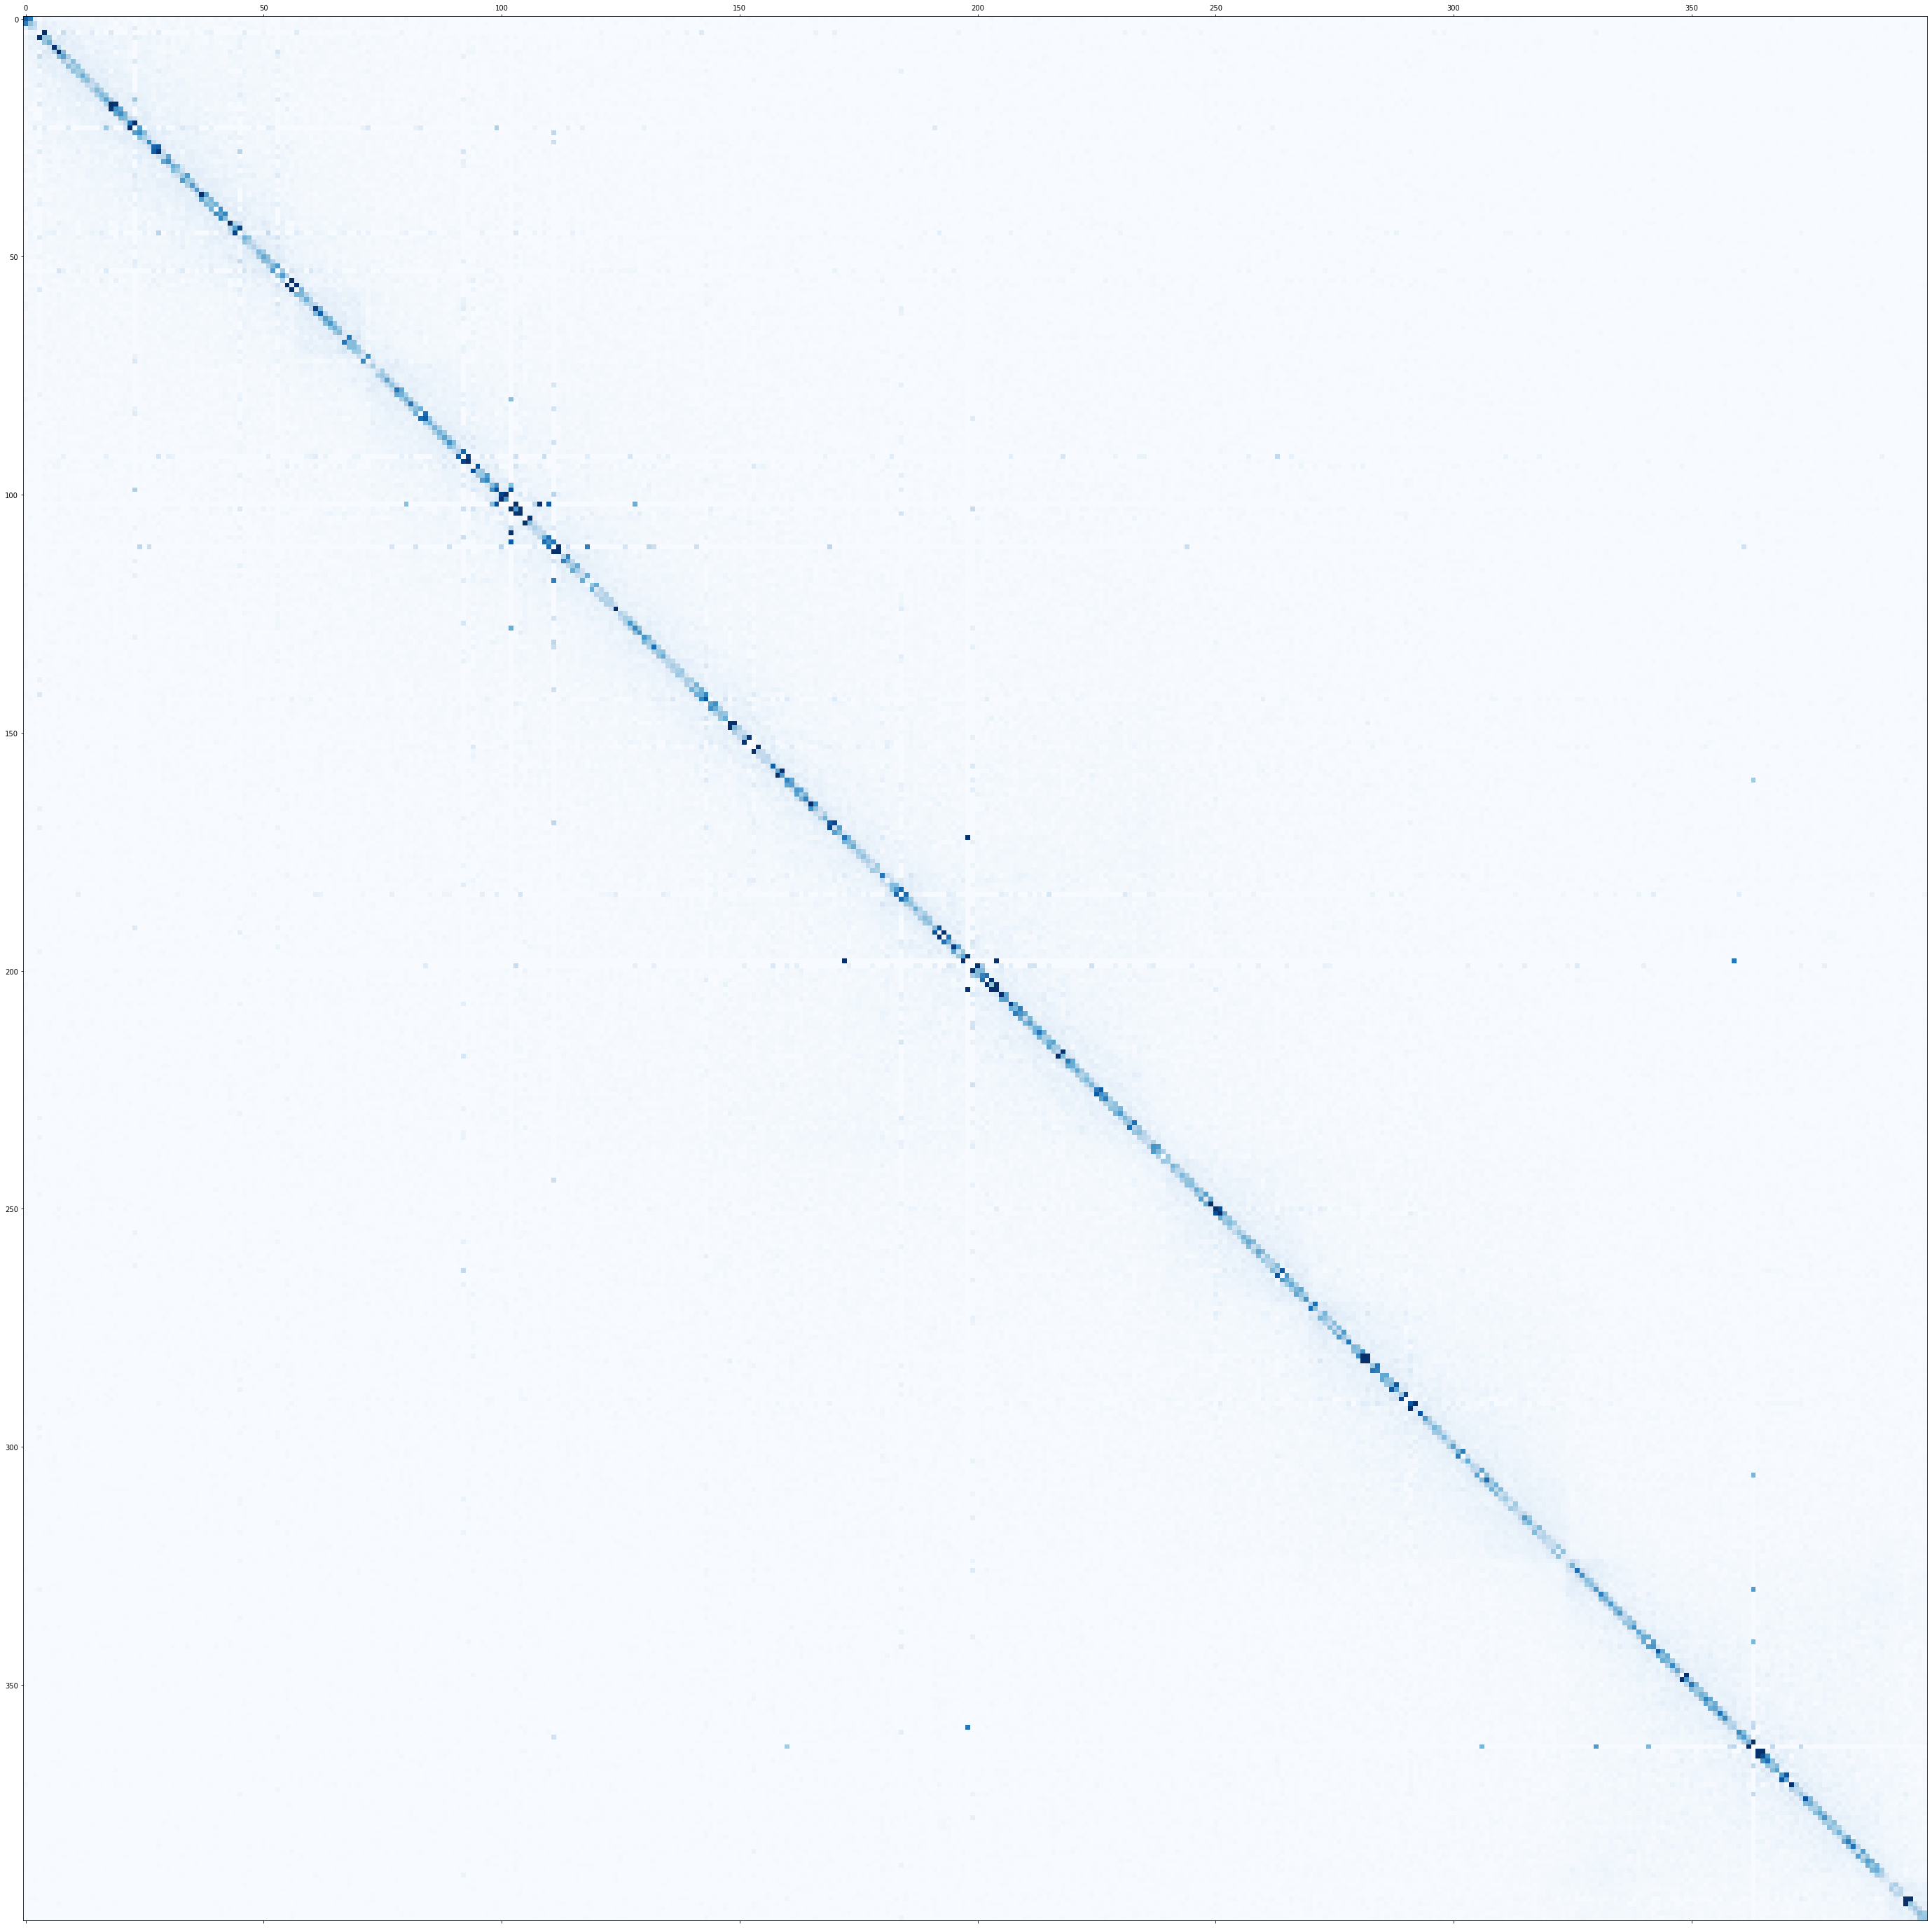

In [9]:
plt.figure(figsize=(50,50))
plt.matshow(hr, cmap=plt.cm.Blues, fignum=0)
plt.show()

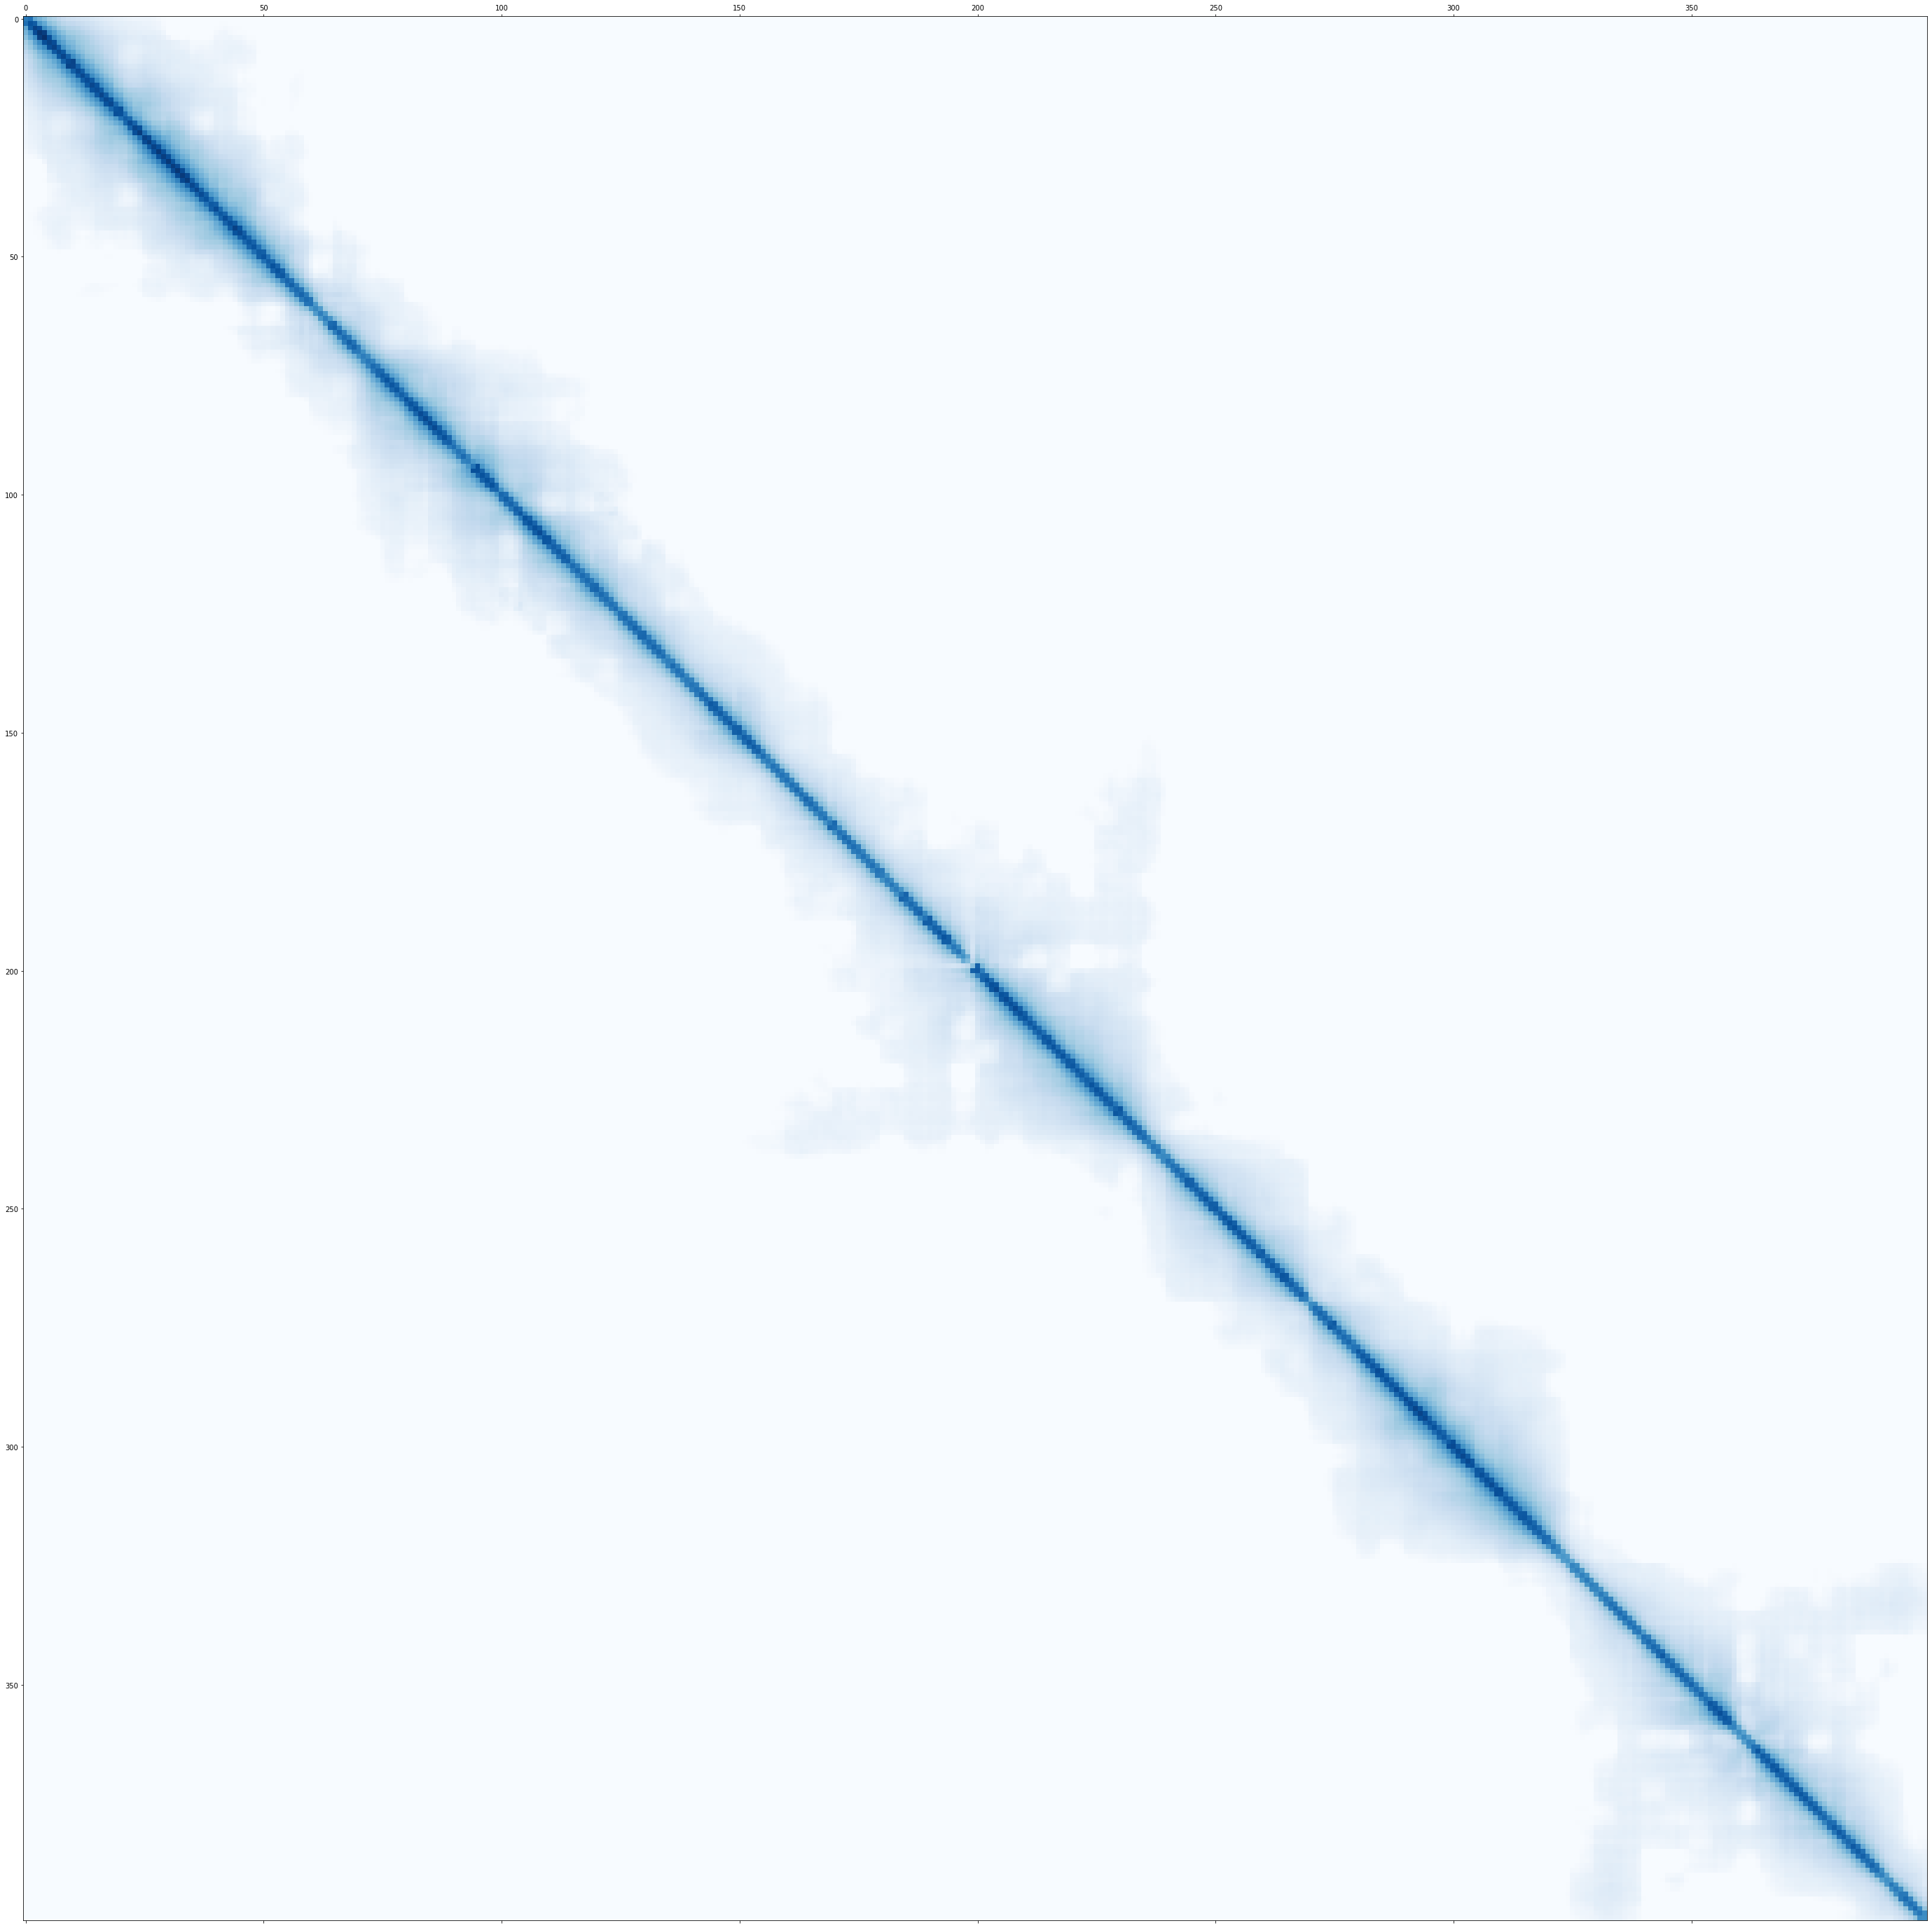

In [67]:
output = np.load(os.path.join(analyse_path, 'validation', 'chr{}_1000b.npz'.format(chr)))['out']
output = output[y, x]
if x == 0:
    output = (output + output.T) / 2
    output = output.astype(np.int32)
# output[output!=0] = 1

plt.figure(figsize=(50,50))
plt.matshow(output, cmap=plt.cm.Blues, fignum=0)
plt.show()